### 【 QQ Plot - 정규성/왜도/첨도 체크 】

- 정규분포 가정이 필요한 모델에서 필수:
    * 선형회위(OLS): 잔차가 정규인지 확인
    * ANOVA, t-test : 데이터 정규성
    * Box-Cox 변환 필요 여부 판단
    * 치우침 개선 전·후 비교
    * 이상치(outlier) 탐지

- 무슨 변환을 해야 하는지 방향성도 잡아줌

In [52]:
## 모듈 로딩
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox, yeojohnson        ## 왜도 /첨도 변환 함수
import koreanize_matplotlib
from scipy.stats import probplot, skew, kurtosis     ## qqplot 그려주는 함수

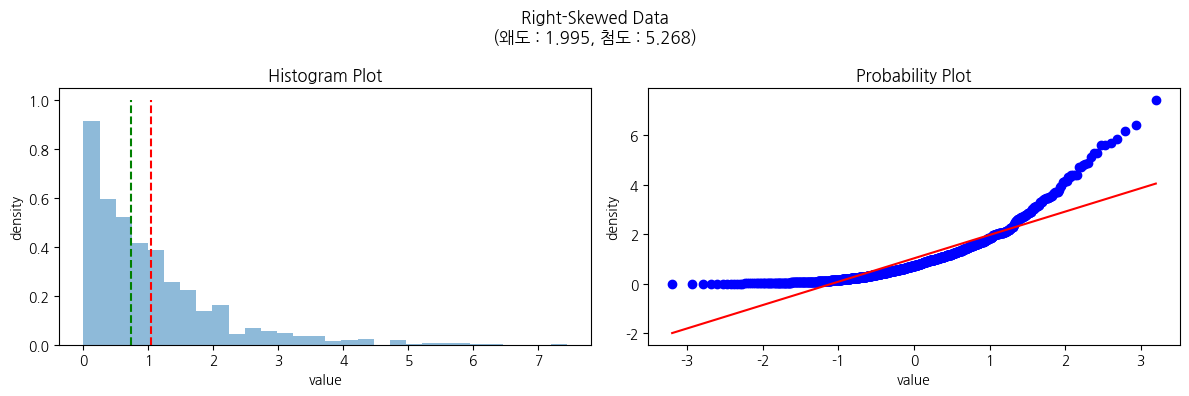

In [53]:
## ==========================================================
## 임시데이터 - 왼쪽 쏠린 데이터
## ==========================================================
x = np.random.exponential(size=1000)
x_mean = np.mean(x)
x_median = np.median(x)
x_skew  = skew(x, bias=False)
x_ku = kurtosis(x, fisher=True, bias=False)

## ==========================================================
## 데이터 분포 시각화 - 히스토그램
## ==========================================================
fig, axes = plt.subplots(1,2, figsize=(12,4))


##- 데이터 히스토그램
axes[0].hist(x, bins=30, density=True, alpha=0.5)
axes[0].vlines(x_mean, 0,1, color='red', linestyles='dashed')
axes[0].vlines(x_median, 0,1, color='green', linestyles='dashed')
axes[0].set_title("Histogram Plot")
axes[0].set_xlabel("value")
axes[0].set_ylabel("density")


##- 데이터 QQ 그래프
probplot(x, dist="norm", plot=axes[1])
axes[1].set_xlabel("value")
axes[1].set_ylabel("density")

plt.suptitle(f"Right-Skewed Data\n(왜도 : {x_skew:.3f}, 첨도 : {x_ku:.3f})")
plt.tight_layout()
plt.show()

## 직선이 아니니까 정규분포로아 모양이 다른것
## 오른쪽에 떨어진 점들은 => 뾰족하다는 뜻

=== 워본 양수 데이터  (Exponential) ===
   개수      : 1000
   평균      : 0.973
   표준편차   : 0.973
   왜도      : 1.868
   첨도(초과) : 5.250 (초과첨도, 정규분포는 0 근처)

=== Box-Cox 변환 데이터 (lambda=0.246) ===
   개수      : 1000
   평균      : -0.411
   표준편차   : 1.022
   왜도      : -0.055
   첨도(초과) : -0.468 (초과첨도, 정규분포는 0 근처)

=== 원본 실수 데이터 (Laplace) ===
   개수      : 1000
   평균      : 0.039
   표준편차   : 1.432
   왜도      : 0.297
   첨도(초과) : 2.016 (초과첨도, 정규분포는 0 근처)

=== Yeo-Johnson 변환 데이터 (lambda=0.934) ===
   개수      : 1000
   평균      : -0.001
   표준편차   : 1.427
   왜도      : 0.026
   첨도(초과) : 1.821 (초과첨도, 정규분포는 0 근처)



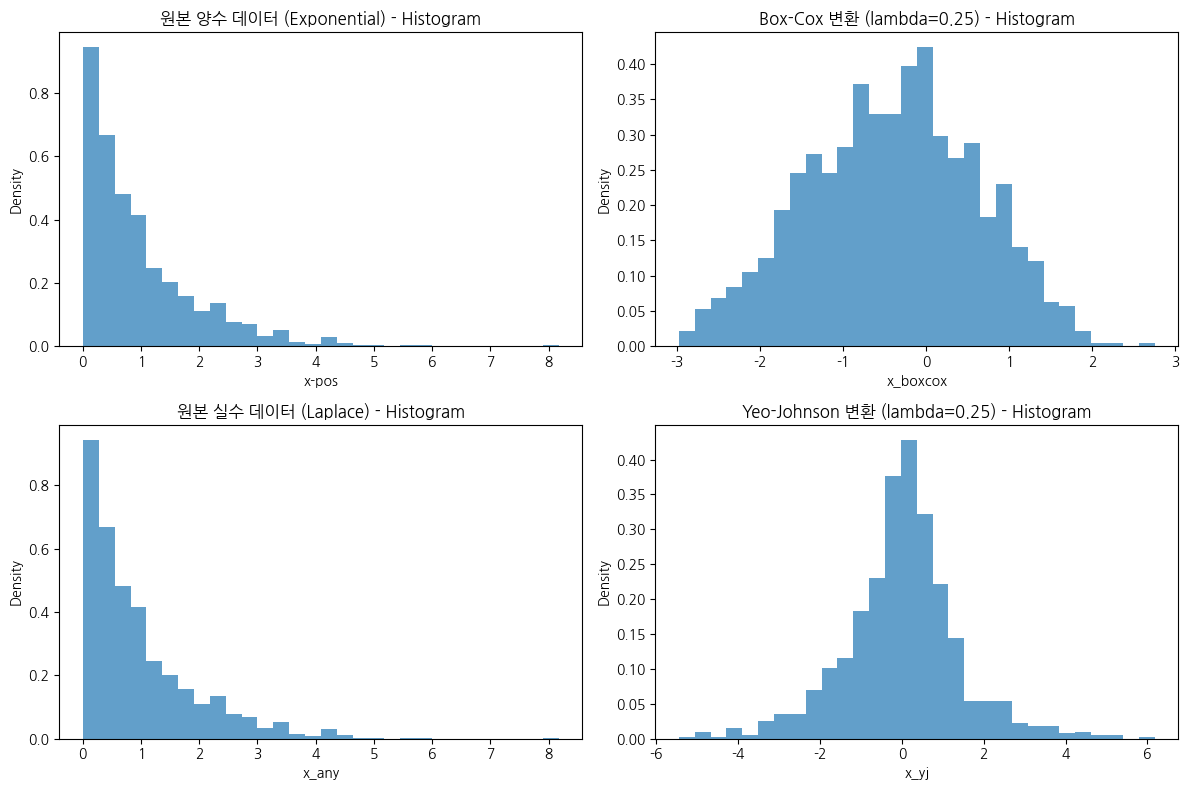

In [56]:
## ---------------------------------------------------------------
## 데이터의 기술 통계량 출력
## ---------------------------------------------------------------
def print_stats(x, label="data"):
    '''간단 통계량 + 왜도/첨도 출력 함수'''
    s = pd.Series(x)
    print(f"=== {label} ===")
    print(f"   개수      : {len(s)}")
    print(f"   평균      : {s.mean():.3f}")
    print(f"   표준편차   : {s.std(ddof=1):.3f}")
    print(f"   왜도      : {s.skew():.3f}")
    print(f"   첨도(초과) : {s.kurt():.3f} (초과첨도, 정규분포는 0 근처)")
    print()

## ---------------------------------------------------------------
## 1. Box-Cox 예제 (양수 데이터) : 오른쪽 꼬리가 긴 지수분포 데이터를 사용
## ---------------------------------------------------------------
# 양수 데스트 데이터
np.random.seed(42)
x_pos = np.random.exponential(scale=1.0, size=1000)  # > 0

print_stats(x_pos, "워본 양수 데이터  (Exponential)")

# Box-Cox 변환 (양수만 가능)
x_boxcox, lambda_bc = boxcox(x_pos)  # lambda 자동 추정
print_stats(x_boxcox, f"Box-Cox 변환 데이터 (lambda={lambda_bc:.3f})")

## ----------------------------------------------------------------
# 2. Yeo-Johnson 예제 ( 음수 포함 데이터) : 평균 0, 양/음 혼합된 치우친 분포 예제로 Laplace 사용
## ----------------------------------------------------------------
# 평균 0, 표준편차 1 
x_any = np.random.laplace(loc=0.0, scale=1.0, size=1000) ## 음수/양수 혼합

print_stats(x_any, "원본 실수 데이터 (Laplace)")

# Yeo-Johnson 변환 (음수 포함 가능)
x_yj, lambda_yj = yeojohnson(x_any)
print_stats(x_yj, f"Yeo-Johnson 변환 데이터 (lambda={lambda_yj:.3f})")


# -------------------------------------------------------------------
fig, axes = plt.subplots(2,2, figsize=(12,8))

# (위) Box-Cox 전/후
axes[0,0].hist(x_pos, bins=30, density=True, alpha=0.7)
axes[0,0].set_title("원본 양수 데이터 (Exponential) - Histogram")
axes[0,0].set_xlabel("x-pos")
axes[0,0].set_ylabel("Density")

axes[0,1].hist(x_boxcox, bins=30, density=True, alpha=0.7)
axes[0,1].set_title(f"Box-Cox 변환 (lambda={lambda_bc:.2f}) - Histogram")
axes[0,1].set_xlabel("x_boxcox")
axes[0,1].set_ylabel("Density")

# (아래) Yeo-Johnson 전/후 
axes[1,0].hist(x_pos, bins=30, density=True, alpha=0.7)
axes[1,0].set_title("원본 실수 데이터 (Laplace) - Histogram")
axes[1,0].set_xlabel("x_any")
axes[1,0].set_ylabel("Density")

axes[1,1].hist(x_yj, bins=30, density=True, alpha=0.7)
axes[1,1].set_title(f"Yeo-Johnson 변환 (lambda={lambda_bc:.2f}) - Histogram")
axes[1,1].set_xlabel("x_yj")
axes[1,1].set_ylabel("Density")

plt.tight_layout()
plt.show()